In [30]:
#Importing our python's data manipulation libraries
import pandas as pd
import numpy as np

In [31]:
#Reading our data set
data = pd.read_csv("cars.csv")

I - Data Cleaning

In [32]:
data.sample(10)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
12072,Renault,Laguna,mechanical,white,234234,2000,diesel,False,diesel,1.9,...,False,False,False,False,False,False,False,False,False,241
29521,BMW,730,automatic,blue,550000,1999,diesel,False,diesel,3.0,...,True,True,False,True,False,False,True,True,True,130
30110,Mazda,6,mechanical,blue,141000,2015,diesel,False,diesel,2.2,...,False,False,True,False,True,True,True,False,True,11
7876,SsangYong,Kyron,automatic,black,205000,2007,diesel,False,diesel,2.0,...,False,False,True,False,True,False,True,True,True,111
3480,Opel,Astra,mechanical,blue,300000,1996,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,True,True,126
3749,Opel,Insignia,mechanical,white,200000,2008,diesel,False,diesel,2.0,...,True,False,False,False,False,True,True,True,False,130
26324,Nissan,Almera Tino,automatic,blue,350000,2001,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,False,11
25982,Nissan,Maxima,mechanical,grey,300000,1997,gasoline,False,gasoline,3.0,...,False,False,False,True,True,False,False,False,True,86
12,Subaru,Forester,mechanical,other,321000,2002,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,False,2
12953,Renault,Megane,mechanical,blue,205622,2006,gasoline,False,gasoline,1.6,...,True,False,False,False,False,False,False,True,True,16


In [33]:
data.shape

(38531, 30)

In [34]:
#check na value
data.isna().values.any()

True

In [35]:
#Deleting na values
data = data.dropna()
data.isna().values.any()
data.shape

(38521, 30)

In [36]:
#Deleting some invalid columns
data = data.iloc[:,0:19]
data.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7


In [37]:

data.shape
data=data.drop(columns="engine_has_gas")
data=data.drop(columns="engine_type")
data=data.drop(columns="location_region")

In [38]:
#Show some limited values
print("Transmission: ", data.transmission.unique())
print("Engine Fuel: ", data.engine_fuel.unique())
print("Body Type: ", data.body_type.unique())
print("State: ", data.state.unique())
print("Driven Train: ", data.drivetrain.unique())

Transmission:  ['automatic' 'mechanical']
Engine Fuel:  ['gasoline' 'gas' 'diesel' 'hybrid-petrol' 'hybrid-diesel']
Body Type:  ['universal' 'suv' 'sedan' 'hatchback' 'liftback' 'minivan' 'minibus'
 'van' 'pickup' 'coupe' 'cabriolet' 'limousine']
State:  ['owned' 'emergency' 'new']
Driven Train:  ['all' 'front' 'rear']


In [39]:
data.shape

(38521, 16)

In [40]:
# let's encode text or categorical data using one hot encoding
# let's create  dummy variables for columns that have limited values
dummy = pd.get_dummies(data[["engine_fuel", "body_type", "transmission","state","drivetrain","color","has_warranty","is_exchangeable"]], drop_first = True)
dummy.head()

,has_warranty,is_exchangeable,engine_fuel_gas,engine_fuel_gasoline,engine_fuel_hybrid-diesel,engine_fuel_hybrid-petrol,body_type_coupe,body_type_hatchback,body_type_liftback,body_type_limousine,...,color_brown,color_green,color_grey,color_orange,color_other,color_red,color_silver,color_violet,color_white,color_yellow
0,False,False,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,False,True,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,True,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,False,True,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,True,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
data.shape

(38521, 44)

In [41]:
# Concat dummy vars to the data
data = pd.concat( [data, dummy], axis = 1)
# now we don't need that original text data columns so let's drop it
data.drop(columns = ["engine_fuel", "body_type", "transmission","state","drivetrain","color","has_warranty","is_exchangeable"], inplace = True)

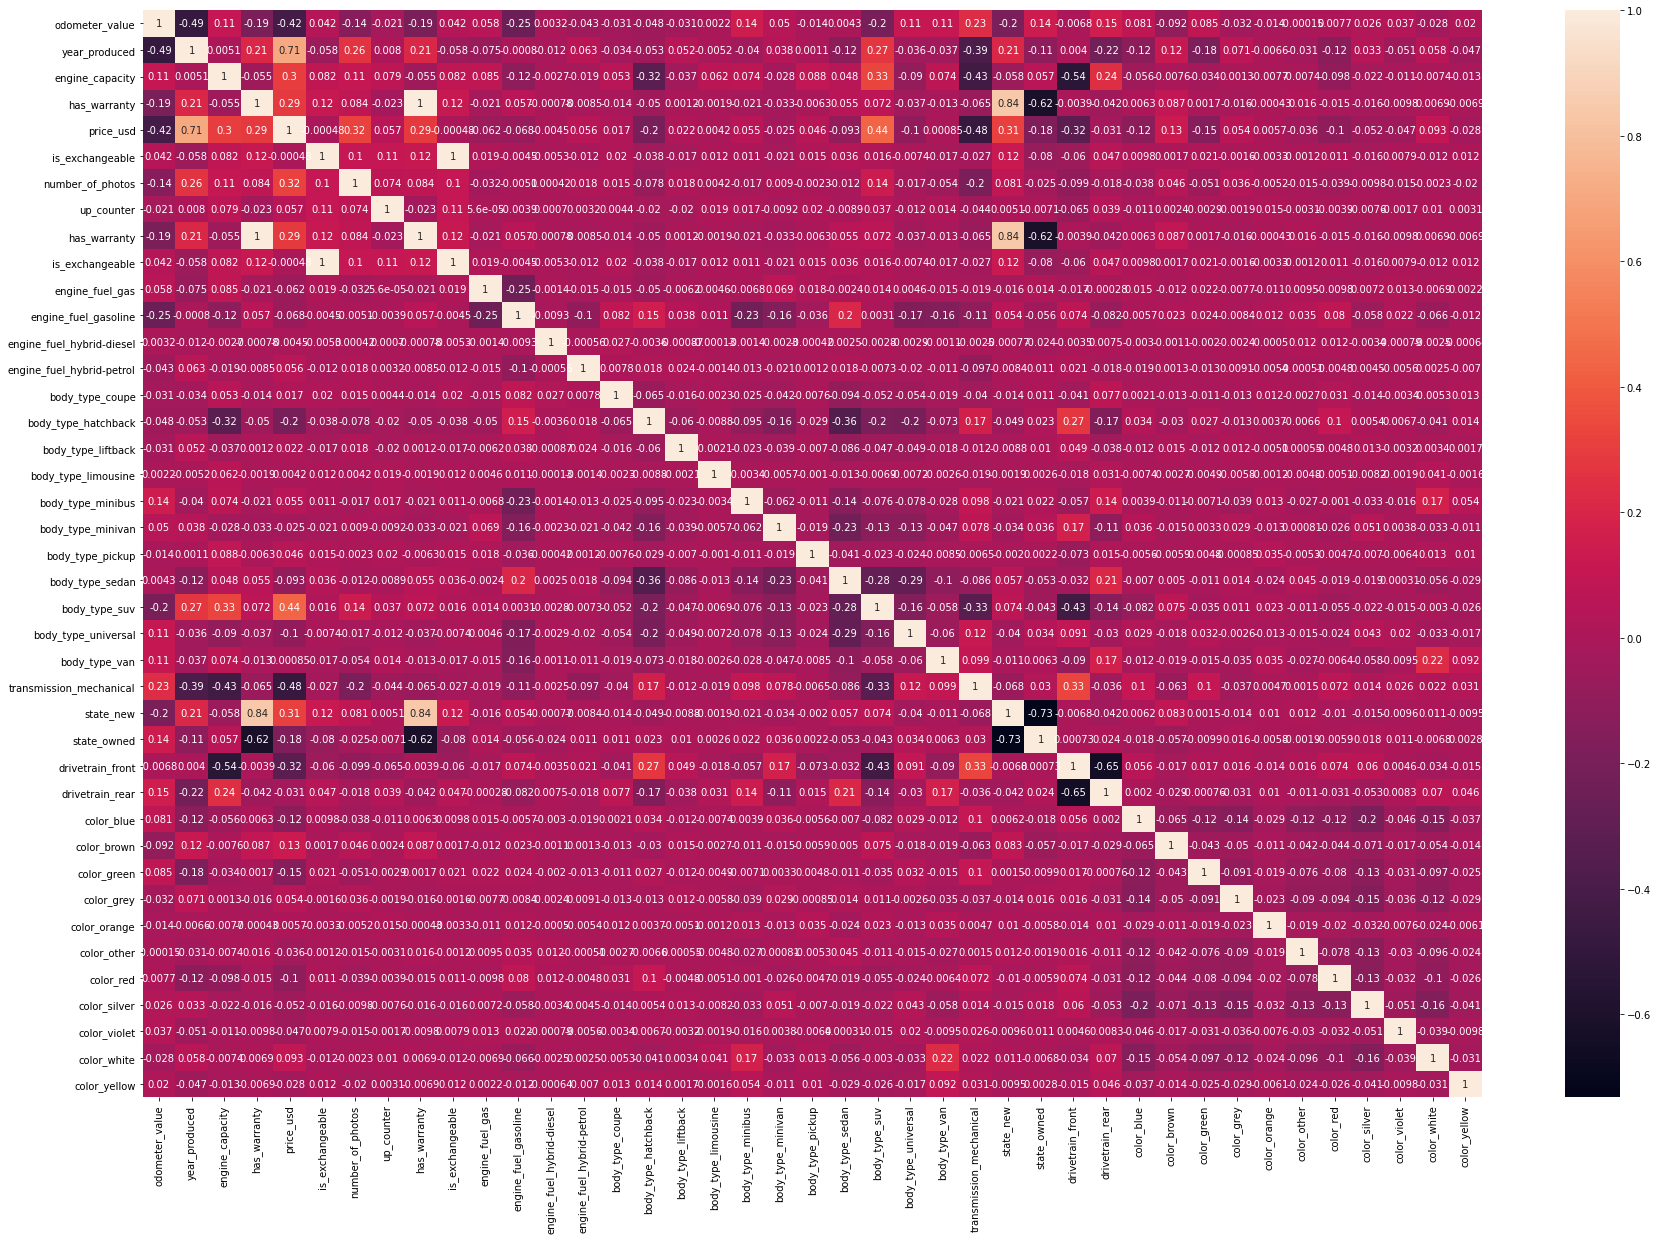

In [42]:
# let's get a corelation of our data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (30, 20))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [44]:
#For Manufacturer and model names
data.manufacturer_name = data.	manufacturer_name.str.lower()
data.model_name = data.model_name.str.lower()

dummy = pd.get_dummies(data[["manufacturer_name","model_name"]], drop_first = True)
# here we dropped first columns which is 800 for prevent dummy variable trap 

data = pd.concat([data, dummy], axis = 1)
# now we don't need Car_Name columns so let's drop it
data.drop(columns = ["manufacturer_name", "model_name"], inplace = True)